In [1]:
import numpy as np
import gym_envs.envs.traffic_light_support_functions as tlsf

cycleTime = 60
minGreentime = 5
numberOfPhases = 6
intergreenMatrix = np.zeros((numberOfPhases, numberOfPhases))
intergreenMatrix = [
    [0, 0, 0, 7, 6, 6],
    [0, 0, 0, 5, 0, 0],
    [8, 0, 0, 0, 5, 0],
    [6, 6, 0, 0, 8, 0],
    [8, 0, 6, 5, 0, 0],
    [6, 0, 0, 0, 0, 0],
]

phasePlan = np.full((numberOfPhases,cycleTime), 0)

initialPhaseplan = np.full((numberOfPhases, cycleTime),'r')

starting_phases = [1, 1, 2, 2, 1, 2]
phase_lengths = [
    [19, 2, 14, 3, 22],
    [41, 2, 13, 4],
    [2, 34, 3, 21],
    [2, 13, 3, 42],
    [40, 2, 14, 3, 1],
    [2, 13, 3, 42]
]

initialPhaseplan = tlsf.generate_phase_plan(starting_phases, phase_lengths)

In [2]:
# import gymnasium as gym
# import gym_envs
# 
# env = gym.make('TrafficEnv-V0', render_mode ='human', starting_phases = starting_phases, phase_lengths = phase_lengths)
# obs, info = env.reset()
# tmp = env.step(np.array([0]))

In [3]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import gymnasium as gym
import numpy as np
import tensorflow as tf

# Configuration parameters for the whole setup
gamma = 0.99  # Discount factor for past rewards
epsilon = 1.0  # Epsilon greedy parameter
epsilon_min = 0.1  # Minimum epsilon greedy parameter
epsilon_max = 1.0  # Maximum epsilon greedy parameter
epsilon_interval = (
    epsilon_max - epsilon_min
)  # Rate at which to reduce chance of random action being taken
batch_size = 64  # Size of batch taken from replay buffer
max_episodes = 10  # Limit training episodes, will run until solved if smaller than 1

# Use the Atari environment
# Specify the `render_mode` parameter to show the attempts of the agent in a pop up window.
env = gym.make('TrafficEnv-V0', render_mode ='console', starting_phases = starting_phases, phase_lengths = phase_lengths)


 Retrying in 1 seconds


In [4]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

num_actions = env.action_space.n

def create_q_model(neurons_layer1=32, neurons_layer2=64):
    # Bemeneti rétegek létrehozása
    occupancy_input = Input(shape=(6,), name='occupancy')
    vehicle_count_input = Input(shape=(6,), name='vehicle_count')
    phase_plan_input = Input(shape=(5,6,60), name='last_five_phaseplan')

    # Az egyes bemeneti rétegek feldolgozása
    occupancy_features = Dense(neurons_layer1, activation='relu')(occupancy_input)
    vehicle_count_features = Dense(neurons_layer1, activation='relu')(vehicle_count_input)
    phase_plan_features = Flatten()(phase_plan_input)  # A 3D adatot 1D-vé alakítjuk a további feldolgozáshoz
    phase_plan_features = Dense(neurons_layer1, activation='relu')(phase_plan_features)

    # A feldolgozott bemenetek összefűzése
    x = Concatenate()([occupancy_features, vehicle_count_features, phase_plan_features])

    # További rétegek hozzáadása
    x = Dense(neurons_layer2, activation='relu')(x)
    output = Dense(num_actions, activation='linear')(x)  # A kimeneti réteg

    # Modell létrehozása
    model = Model(inputs=[occupancy_input, vehicle_count_input, phase_plan_input], outputs=output)
    
    return model
model = create_q_model()
model_target = create_q_model()

2024-07-09 01:31:22.304226: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-07-09 01:31:22.304254: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-07-09 01:31:22.304262: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-07-09 01:31:22.304279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-09 01:31:22.304297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Step #0.00 (0ms ?*RT. ?UPS, TraCI: 474ms, vehicles TOT 0 ACT 0 BUF 0)                    
 Retrying in 1 seconds
Step:  1
Step:  2
Step:  3
Step:  4
Step:  5
Step:  6
Step:  7
Step:  8
Step:  9
Step:  10
Step:  11
Step:  12
Step:  13
Step:  14
Step:  15
Step:  16
Step:  17
Step:  18
Step:  19
Step:  20
Step:  21
Step:  22
Step:  23
Step:  24
Step:  25
Step:  26
Step:  27
Step:  28
Step:  29
Step:  30
Step:  31
Step:  32
Step:  33
Step:  34
Step:  35
Step:  36
Step:  37
Step:  38
Step:  39
Step:  40
Step:  41
Step:  42
Step:  43
Step:  44
Step:  45
Step:  46
Step:  47
Step:  48
Step:  49
Step:  50
Step:  51
Step:  52
Step:  53
Step:  54
Step:  55
Step:  56
Episode:  1 Reward:  -4011730.707116086
Step #3660.00 (1ms ~= 1000.00*RT, ~111000.00UPS, TraCI: 5ms, vehicles TOT 2489 ACT 111 BUF
 Retrying in 1 seconds
Step:  57
Step:  58
Step:  59
Step:  60
Step:  61
Step:  62
Step:  63
Step:  64
Step:  65
Step:  66
Step:  67
Step:  68
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


2024-07-09 01:31:35.800084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Step:  69
Step:  70
Step:  71
Step:  72
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Step:  73
Step:  74
Step:  75
Step:  76
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Step:  77
Step:  78
Step:  79
Step:  80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Step:  81
Step:  82
Step:  83
Step:  84
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Step:  85
Step:  86
Step:  87
Step:  88
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Step:  89
Step:  90
Step:  91
Step:  92
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Step:  93
Step:  94
Step:  95
Step:  96
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Step:  97
Step:  98
Step:  99
Step:  100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Step:  101
Step:  102
Step:  103
Step:  104
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Step:  105
Step:  106
Step:  107
Step:  108
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Step:  109
Step:  110
Step:  111
Step:  112
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Episode:  2 Reward:  -10568.59617319607
Step #3660.00 (0ms ?*RT. ?UPS, TraCI: 149ms, vehicles TOT 0 ACT 0 BUF 0)                  
 Retryi

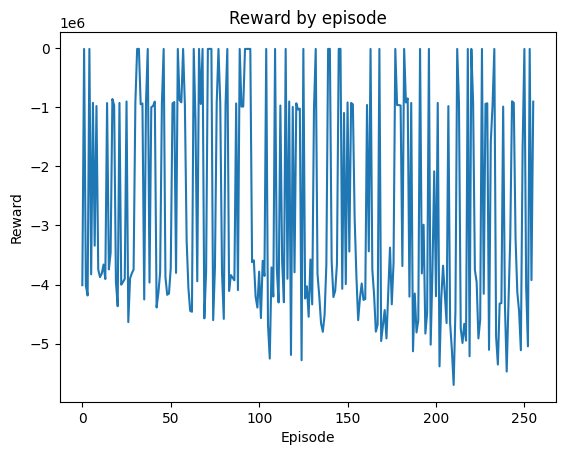

In [5]:
import matplotlib.pyplot as plt

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00025, clipnorm=1.0)

# Experience replay buffers
action_history = []
state_history = []
state_next_history = []
rewards_history = []
episode_rewards = []
done_history = []
episode_reward_history = []
running_reward = 0
episode_count = 0
step_count = 0

# Number of steps to take random action and observe output
epsilon_random_steps = 50000/50
# Number of steps for exploration
epsilon_greedy_steps = 1000000.0/50
# Maximum replay length
# Note: The Deepmind paper suggests 1000000 however this causes memory issues
max_memory_length = 100000/50
# Train the model after 4 actions
update_after_actions = 4
# How often to update the target network
update_target_network = 10000/50
# Using huber loss for stability
loss_function = tf.keras.losses.Huber()

while episode_count < 256:
    observation, _ = env.reset()
    state = observation
    episode_reward = 0
    
    done = False
    
    while True:
        step_count += 1
        print("Step: ", step_count)
        
        if step_count < epsilon_random_steps or epsilon > np.random.rand(1)[0]:
            action = np.array([np.random.choice(num_actions)])
        else:
            state_tensor = [tf.convert_to_tensor(state['occupancy']), tf.convert_to_tensor(state['vehicle_count']), tf.convert_to_tensor(state['last_five_phaseplan'])]
            state_tensor = [tf.expand_dims(tensor, 0) for tensor in state_tensor]
            action_probs = model(state_tensor, training=False)
            action = np.array([np.argmax(action_probs[0])])
            
        epsilon -= epsilon_interval / epsilon_greedy_steps
        epsilon = max(epsilon, epsilon_min)
        
        state_next, reward, done, _, _ = env.step(action)
        
        episode_reward += reward
        
        action_history.append(action)
        state_history.append(state)
        state_next_history.append(state_next)
        rewards_history.append(reward)
        done_history.append(done)
        state = state_next
        
        if step_count % update_after_actions == 0 and len(done_history) > batch_size:
            indices = np.random.choice(range(len(done_history)), size=batch_size)
            
            state_sample = np.array([state_history[i] for i in indices])
            state_next_sample = np.array([state_next_history[i] for i in indices])
            
            state_sample_occupancy = tf.stack([tf.convert_to_tensor(sample['occupancy']) for sample in state_sample])
            state_sample_vehicle_count = tf.stack([tf.convert_to_tensor(sample['vehicle_count']) for sample in state_sample])
            state_sample_phaseplan = tf.stack([tf.convert_to_tensor(sample['last_five_phaseplan']) for sample in state_sample])
            
            state_next_sample_occupancy = tf.stack([tf.convert_to_tensor(sample['occupancy']) for sample in state_next_sample])
            state_next_sample_vehicle_count = tf.stack([tf.convert_to_tensor(sample['vehicle_count']) for sample in state_next_sample])
            state_next_sample_phaseplan = tf.stack([tf.convert_to_tensor(sample['last_five_phaseplan']) for sample in state_next_sample])
            
            rewards_sample = [rewards_history[i] for i in indices]
            action_sample = [action_history[i] for i in indices]
            done_sample = tf.convert_to_tensor([float(done_history[i]) for i in indices])
            
            future_rewards = model_target.predict([state_next_sample_occupancy, state_next_sample_vehicle_count, state_next_sample_phaseplan])
            updated_q_values = rewards_sample + gamma * tf.keras.ops.amax(
                future_rewards, axis=1
            )
            
            updated_q_values = updated_q_values * (1 - done_sample) - done_sample
            
            masks = tf.keras.ops.one_hot(action_sample, num_actions)
            
            with tf.GradientTape() as tape:
                q_values = model([state_sample_occupancy, state_sample_vehicle_count, state_sample_phaseplan])
                
                q_action = tf.keras.ops.sum(tf.keras.ops.multiply(q_values, masks), axis=2)
                loss = loss_function(updated_q_values, q_action)
                
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            
        if step_count % update_target_network == 0:
            model_target.set_weights(model.get_weights())
            
            template = "running reward: {:.2f} at episode {}, frame count {}"
            print(template.format(running_reward, episode_count, step_count))
            
        if len(rewards_history) > max_memory_length:
            del rewards_history[:1]
            del state_history[:1]
            del state_next_history[:1]
            del action_history[:1]
            del done_history[:1]
            
        if done:
            episode_rewards.append(episode_reward)
            break
        
    episode_reward_history.append(episode_reward)
    if len(episode_reward_history) > 100:
        del episode_reward_history[:1]
    running_reward = np.mean(episode_reward_history)
    
    episode_count +=1
    print("Episode: ", episode_count, "Reward: ", episode_reward)
    
plt.plot(episode_rewards)
plt.title('Reward by episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()
    